In [1]:
import pandas as pd
import numpy as np
import time
import re
import string
import random

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#load dataset and preprocess
twt = pd.read_csv('./train.csv')
# twt = twt.set_index('id')
twt.shape
print(twt.info())
twt.loc[~twt['keyword'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [2]:
twt['text'][31]

'@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C'

In [3]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [4]:
twt['clean_tweet'] = twt['text'].apply(lambda x: clean_tweet(x))

In [17]:
disaster_df = twt.loc[twt['target'] == 1]
disaster_df
disaster_df['clean_tweet'] = disaster_df['text'].apply(lambda x: clean_tweet(x))
disaster_df['clean_tweet'][7609]

<ipython-input-17-7bea02041bf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_df['clean_tweet'] = disaster_df['text'].apply(lambda x: clean_tweet(x))


'ahrary The out of control wild fires in California even in the Northern part of the state Very troubling'

In [13]:
non_disaster_df = twt.loc[twt['target'] == 0]
non_disaster_df
non_disaster_df['clean_tweet'] = non_disaster_df['text'].apply(lambda x: clean_tweet(x))
non_disaster_df['clean_tweet'][7581]


<ipython-input-13-07231d907361>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_disaster_df['clean_tweet'] = non_disaster_df['text'].apply(lambda x: clean_tweet(x))


'Great atmosphere at the British Lion gig tonight Hearing is wrecked'

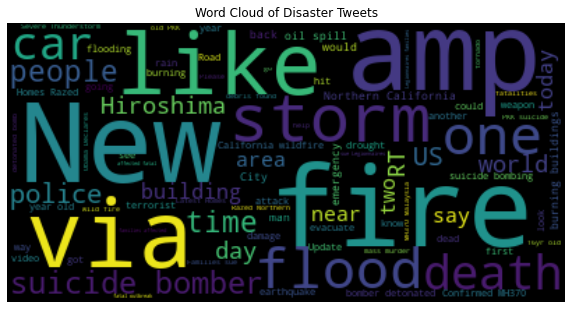

In [24]:
# change here for clean tweet
all_disaster_tweets = ' '.join(tweet for tweet in disaster_df['clean_tweet'])
stop_words = stopwords.words('english')
wordcloud_disaster = WordCloud(stopwords=stop_words).generate(all_disaster_tweets)
plt.figure(figsize = (10,10))
plt.title("Word Cloud of Disaster Tweets")
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis("off")
plt.show()

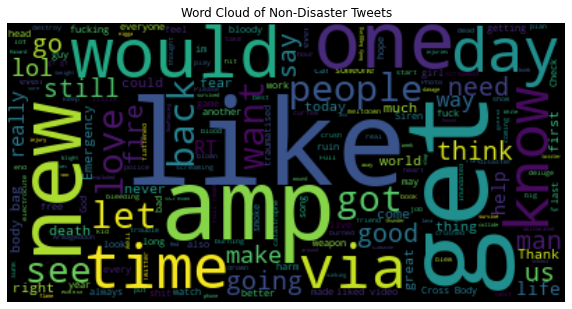

In [27]:
all_non_disaster_tweets = ' '.join(tweet for tweet in non_disaster_df['clean_tweet'])
stop_words = stopwords.words('english')
wordcloud_non_disaster = WordCloud(stopwords=stop_words).generate(all_non_disaster_tweets)
plt.figure(figsize = (10,10))
plt.title("Word Cloud of Non-Disaster Tweets")
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.axis("off")
plt.show()

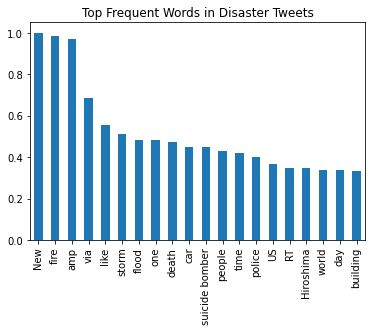

In [39]:
df_freq_disaster = pd.DataFrame.from_dict(data = wordcloud_disaster.words_, orient='index')
df_freq_disaster = df_freq_disaster.head(20)
df_freq_disaster.plot.bar(title='Top Frequent Words in Disaster Tweets', legend=False)


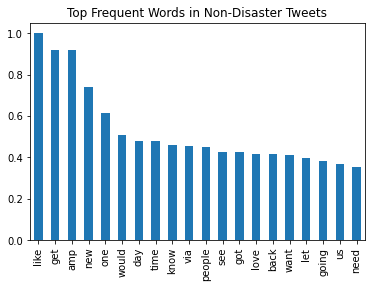

In [40]:
df_freq_non_disaster = pd.DataFrame.from_dict(data = wordcloud_non_disaster.words_, orient='index')
df_freq_non_disaster = df_freq_non_disaster.head(20)
df_freq_non_disaster.plot.bar(title='Top Frequent Words in Non-Disaster Tweets', legend=False)